In [95]:
from scipy import *
from pylab import *
import numpy as np
from scipy.interpolate import interp1d
from IPython.display import Image

h=0.7
k_arr = logspace(-2,1.5,100)

####################################################
### test plots for neutrino batch fiducial model ###
####################################################

####### linear Pmatter from camb
kcamb1, Pcamb1 = np.loadtxt('camb/camb_mnv0.10000_om0.30000_As2.1000_matterpow_0.dat').T
kcamb0, Pcamb0 = np.loadtxt('camb/camb_mnv0.00000_om0.30000_As2.1000_matterpow_0.dat').T

####### bird halofit
kbird1, Pbird1 = np.loadtxt('camb-fidu/camb_mnv0.10000_om0.30000_As2.1000-bird_matterpow_0.dat').T
kbird0, Pbird0 = np.loadtxt('camb-fidu/camb_mnv0.00000_om0.30000_As2.1000-bird_matterpow_0.dat').T

####### takahashi halofit
ktaka1, Ptaka1 = np.loadtxt('camb-fidu/camb_mnv0.10000_om0.30000_As2.1000-halofit_matterpow_0.dat').T
ktaka0, Ptaka0 = np.loadtxt('camb-fidu/camb_mnv0.00000_om0.30000_As2.1000-halofit_matterpow_0.dat').T

####### n-body P_total
knb0, Pnb0 = np.loadtxt('matterpower/particles512/massless_z99/powerspec_tot_050.txt').T
knb1, Pnb1 = np.loadtxt('matterpower/particles512/massive_z99/powerspec_tot_050.txt').T
knb1_z3, Pnb1_z3 = np.loadtxt('matterpower/particles512/massive_z99/powerspec_tot_000.txt').T
knb0 *= 1e3
knb1 *= 1e3
knb1_z3 *=1e3
Pnb0 *= 1e-9
Pnb1 *= 1e-9
Pnb1_z3 *= 1e-9

knb0_1024, Pnb0_1024 = np.loadtxt('matterpower/particles1024/fidu_massless/powerspec_tot_070.txt').T
knb1_1024, Pnb1_1024 = np.loadtxt('matterpower/particles1024/fidu_massive/powerspec_tot_070.txt').T
knb0_1024 *= 1e3
knb1_1024 *= 1e3
Pnb0_1024 *= 1e-9
Pnb1_1024 *= 1e-9


###### P_neutrino from n-body run for the Mnv = 0.1 eV run (fiducial)
knu_z0, Pnu_z0 = np.loadtxt('matterpower/particles512/massive_z99/powerspec_nu_050.txt',skiprows=2).T
knu_z3, Pnu_z3 = np.loadtxt('matterpower/particles512/massive_z99/powerspec_nu_000.txt',skiprows=2).T
knu_z0 *= 1e3
Pnu_z0 *= 1e-9 #(2*pi)**3
knu_z3 *= 1e3
Pnu_z3 *= 1e-9 #(2*pi)**3

###### interpolate to have the same bins for camb output Pmatter
Pcamb1_interp = interp1d(kcamb1, Pcamb1)(k_arr)
Pcamb0_interp = interp1d(kcamb0, Pcamb0)(k_arr)
Pbird1_interp = interp1d(kbird1, Pbird1)(k_arr)
Pbird0_interp = interp1d(kbird0, Pbird0)(k_arr)
Ptaka1_interp = interp1d(ktaka1, Ptaka1)(k_arr)
Ptaka0_interp = interp1d(ktaka0, Ptaka0)(k_arr)

###### P_matter of DM+bary, or "no neutrino" (nn)
kTF, Ttot, Tnn, Tnu = loadtxt('camb/camb_mnv0.10000_om0.30000_As2.1000_transfer_0.dat').T[[0,6,7,5]]
ratio_nn = interp1d(kTF, (Tnn/Ttot)**2)(k_arr)
ratio_nu = interp1d(kTF, (Tnu/Ttot)**2)(k_arr)
Pnn_z0 = Pcamb1_interp * ratio_nn

kcamb1_z3, Pcamb1_z3 = np.loadtxt('camb-fidu/camb_mnv0.10000_om0.30000_As2.1000-linear_matterpow_3.dat').T
Pcamb1_z3_interp = interp1d(kcamb1_z3, Pcamb1_z3, fill_value="extrapolate")(k_arr)
kTF_z3, Ttot_z3, Tnn_z3, Tnu_z3 = loadtxt('camb-fidu/camb_mnv0.10000_om0.30000_As2.1000-linear_transfer_3.dat').T[[0,6,7,5]]
ratio_nn_z3 = interp1d(kTF_z3, (Tnn_z3/Ttot_z3)**2)(k_arr)
Pnn_z3 = Pcamb1_z3_interp * ratio_nn_z3
ratio_nu_z3 = interp1d(kTF_z3, (Tnu_z3/Ttot_z3)**2)(k_arr)

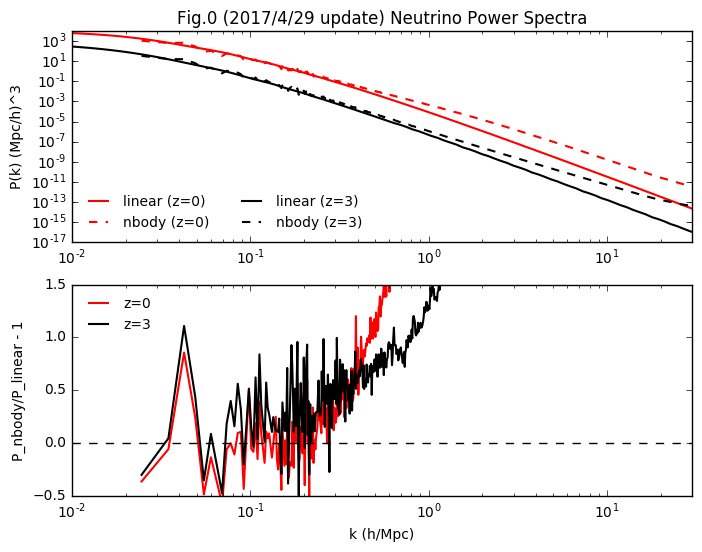

In [39]:
f=figure(figsize=(8,6))
ax=f.add_subplot(211)
ax2=f.add_subplot(212)

ax.plot(k_arr, ratio_nu*Pcamb1_interp, 'r-',lw=1.5,label='linear (z=0)')
ax.plot(knu_z0, Pnu_z0,'r--',lw=1.5,label='nbody (z=0)')

ax.plot(k_arr, ratio_nu_z3*Pcamb1_z3_interp, 'k-',lw=1.5,label='linear (z=3)')
ax.plot(knu_z3, Pnu_z3, 'k--',lw=1.5,label='nbody (z=3)')

ax.set_ylabel('P(k) (Mpc/h)^3')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1e-2, 30)
#ax.set_ylim(0.1, 1e5)
ax.set_title('Fig.0 (2017/4/29 update 5/6) Neutrino Power Spectra')
ax.legend(frameon=0,loc=3,fontsize=10,ncol=2)

Pnu1_z0_bin = interp1d(k_arr, ratio_nu*Pcamb1_interp, fill_value="extrapolate")(knu_z0)
Pnu1_z3_bin = interp1d(k_arr, ratio_nu_z3*Pcamb1_z3_interp, fill_value="extrapolate")(knu_z3)

ax2.plot(knu_z0, Pnu_z0/Pnu1_z0_bin-1, 'r-',lw=1.5,label='z=0')
ax2.plot(knu_z3, Pnu_z3/Pnu1_z3_bin-1, 'k-',lw=1.5,label='z=3')

ax2.set_xlabel('k (h/Mpc)')
ax2.set_ylabel('P_nbody/P_linear - 1')
ax2.set_xscale('log')
ax2.set_xlim(1e-2, 30)
ax2.set_ylim(-0.5, 1.5)
ax2.legend(frameon=0,loc=0,fontsize=10,ncol=1)
ax2.plot([1e-2, 30],[0,0],'k--')
show()

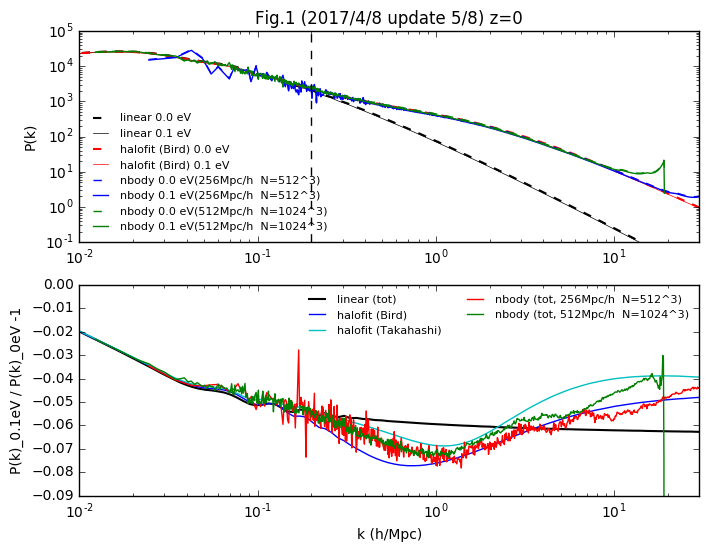

In [97]:
f=figure(figsize=(8,6))
ax=f.add_subplot(211)
ax2=f.add_subplot(212)

ax.plot(kcamb0, Pcamb0, 'k--',lw=1.5, label='linear 0.0 eV')
ax.plot(kcamb1, Pcamb1, 'k-', lw=0.5, label='linear 0.1 eV')

ax.plot(kbird0, Pbird0, 'r--',lw=1.5, label='halofit (Bird) 0.0 eV')
ax.plot(kbird1, Pbird1, 'r-', lw=0.5, label='halofit (Bird) 0.1 eV')

ax.plot(knb0, Pnb0, 'b--', lw=1,label='nbody 0.0 eV(256Mpc/h  N=512^3)')
ax.plot(knb1, Pnb1, 'b-',  lw=1,label='nbody 0.1 eV(256Mpc/h  N=512^3)')
ax.plot(knb0_1024, Pnb0_1024, 'g--', lw=1,label='nbody 0.0 eV(512Mpc/h  N=1024^3)')
ax.plot(knb1_1024, Pnb1_1024, 'g-',  lw=1,label='nbody 0.1 eV(512Mpc/h  N=1024^3)')

ax.plot((0.2,0.2), (0.1,1e5),'k--')
ax.set_ylabel('P(k)')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1e-2, 30)
ax.set_ylim(0.1, 1e5)
ax.set_title('Fig.1 (2017/4/8 update 5/8) z=0')
ax.legend(frameon=0,loc=3,fontsize=8)


ax2.plot(k_arr,Pcamb1_interp/Pcamb0_interp-1,'k-',lw=1.5, label='linear (tot)')
ax2.plot(k_arr,Pbird1_interp/Pbird0_interp-1,'b-',lw=1.0, label='halofit (Bird)')
ax2.plot(k_arr,Ptaka1_interp/Ptaka0_interp-1,'c-',lw=1.0, label='halofit (Takahashi)')
ax2.plot(knb0,Pnb1/Pnb0-1,'r-',lw=1.0, label='nbody (tot, 256Mpc/h  N=512^3)')
ax2.plot(knb0_1024,Pnb1_1024/Pnb0_1024-1,'g-',lw=1.0, label='nbody (tot, 512Mpc/h  N=1024^3)')

#ax2.plot(knb_bin,Pnb1_bin/Pnb0_bin-1,'rx',lw=1.0, label='nbody (no nu)')
#ax2.plot(k_arr, Pnn_z0/Pcamb0_interp-1,'kx',lw=1.0, label='linear (no nu)')


ax2.legend(frameon=0,fontsize=8,ncol=2)
ax2.set_xscale('log')
ax2.set_xlim(1e-2, 30)
ax2.set_ylim(-0.09,0.0)
ax2.set_xlabel('k (h/Mpc)')
ax2.set_ylabel('P(k)_0.1eV / P(k)_0eV -1')
show()

######## note on some test results:
######## the lower power is due to nu mass splitting
######## nor it's due to the definition in omega_m = 1-omega_lambda

# Fig.4 in Ali-Haimoud & Bird 2013

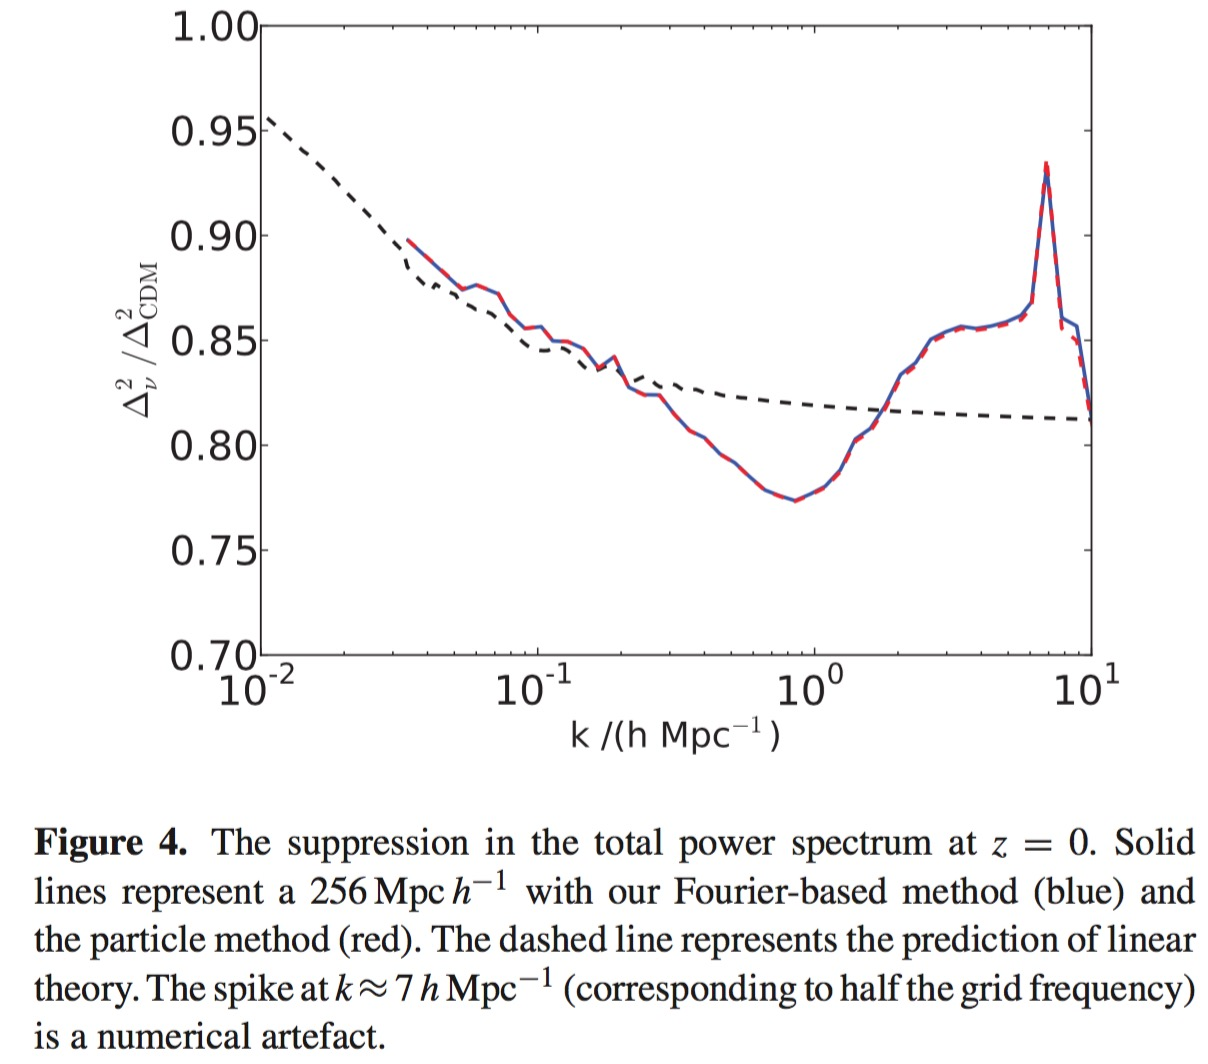

In [8]:
Image("plots/AB13fig4.jpg",width=450)

In [33]:
knb1_IC99, Pnb1_IC99 =  loadtxt ('matterpower/particles512/massive_z99/powerspec_tot_050.txt').T * array([[1e3], [1e-9]])
knb0_IC99, Pnb0_IC99 =  loadtxt ('matterpower/particles512/massless_z99/powerspec_tot_050.txt').T * array([[1e3], [1e-9]])
knb1_IC49, Pnb1_IC49 =  loadtxt ('matterpower/particles512/massive_z49/powerspec_tot_050.txt').T * array([[1e3], [1e-9]])
knb0_IC49, Pnb0_IC49 =  loadtxt ('matterpower/particles512/massless_z49/powerspec_tot_050.txt').T * array([[1e3], [1e-9]])

knbnu1_z0_IC99, Pnbnu1_z0_IC99 =  loadtxt ('matterpower/particles512/massive_z99/powerspec_nu_050.txt').T* array([[1e3], [1e-9]])
knbnu1_z0_IC49, Pnbnu1_z0_IC49 =  loadtxt ('matterpower/particles512/massive_z49/powerspec_nu_050.txt').T* array([[1e3], [1e-9]])
knbnu1_z3_IC99, Pnbnu1_z3_IC99 =  loadtxt ('matterpower/particles512/massive_z99/powerspec_nu_000.txt').T* array([[1e3], [1e-9]])
knbnu1_z3_IC49, Pnbnu1_z3_IC49 =  loadtxt ('matterpower/particles512/massive_z49/powerspec_nu_000.txt').T* array([[1e3], [1e-9]])

######### test for IC redshift
knb1_z3_IC99, Pnb1_z3_IC99 =  loadtxt ('matterpower/particles512/massive_z99/powerspec_tot_000.txt').T * array([[1e3], [1e-9]])
knb0_z3_IC99, Pnb0_z3_IC99 =  loadtxt ('matterpower/particles512/massless_z99/powerspec_tot_000.txt').T * array([[1e3], [1e-9]])
knb1_z3_IC49, Pnb1_z3_IC49 =  loadtxt ('matterpower/particles512/massive_z49/powerspec_tot_000.txt').T * array([[1e3], [1e-9]])
knb0_z3_IC49, Pnb0_z3_IC49 =  loadtxt ('matterpower/particles512/massless_z49/powerspec_tot_000.txt').T * array([[1e3], [1e-9]])

########## get P_matter for z=3
kcamb0_z03, Pcamb0_z03 = np.loadtxt('camb-fidu/camb_mnv0.00000_om0.30000_As2.1000-linear_matterpow_3.dat').T
kcamb1_z03, Pcamb1_z03 = np.loadtxt('camb-fidu/camb_mnv0.10000_om0.30000_As2.1000-linear_matterpow_3.dat').T
Pcamb0_z03_bin = interp1d(kcamb0_z03, Pcamb0_z03, fill_value="extrapolate")(k_arr)
Pcamb1_z03_bin = interp1d(kcamb1_z03, Pcamb1_z03, fill_value="extrapolate")(k_arr)

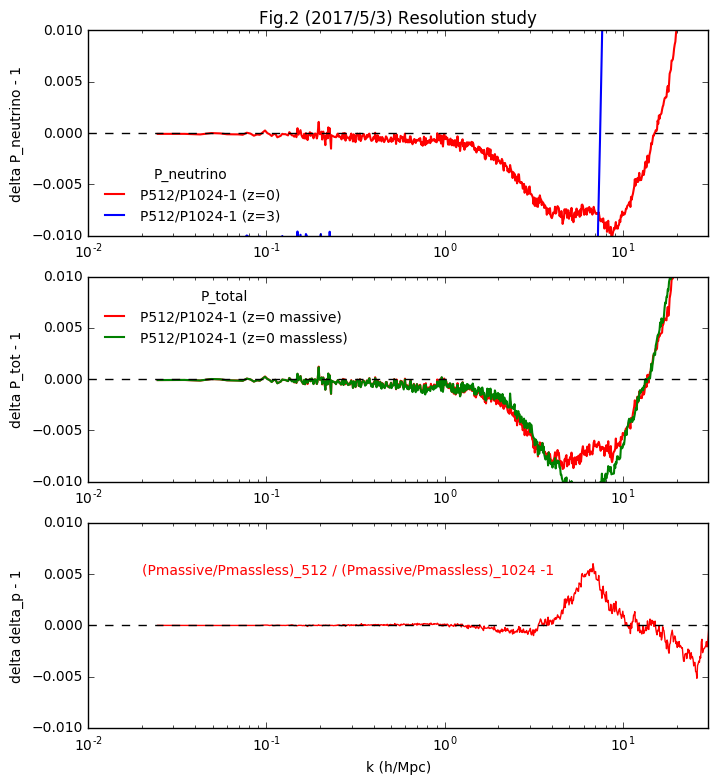

In [31]:
f=figure(figsize=(8,9))
ax=f.add_subplot(311)
ax2=f.add_subplot(312)
ax3=f.add_subplot(313)

ax.plot(knbnu1_z0_IC99, Pnbnu1_z0_IC99/Pnu_z0-1, 'r-',lw=1.5,label='P512/P1024-1 (z=0)')
ax.plot(knbnu1_z3_IC99, Pnbnu1_z3_IC99/Pnu_z3-1, 'b-',lw=1.5,label='P512/P1024-1 (z=3)')

#ax.plot(k_arr, ratio_nu_z3*Pcamb1_z3_interp, 'k-',lw=1.5,label='linear (z=3)')

ax.set_ylabel('delta P_neutrino - 1')
ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlim(1e-2, 30)
ax.set_ylim(-0.01,0.01)
ax.plot([1e-2, 30],[0,0],'k--')
ax.set_title('Fig.2 (2017/5/3) Resolution study')
ax.legend(frameon=0,loc=3,fontsize=10,ncol=1,title='P_neutrino')

ax2.plot(knb1_IC99, Pnb1_IC99/Pnb1-1, 'r-',lw=1.5,label='P512/P1024-1 (z=0 massive)')
ax2.plot(knb0_IC99, Pnb0_IC99/Pnb0-1, 'g-',lw=1.5,label='P512/P1024-1 (z=0 massless)')
ax2.set_ylabel('delta P_tot - 1')
ax2.set_xscale('log')
ax2.set_xlim(1e-2, 30)
ax2.set_ylim(-0.01, 0.01)
ax2.legend(frameon=0,loc=0,fontsize=10,ncol=1,title='P_total')
ax2.plot([1e-2, 30],[0,0],'k--')

ax3.plot(knb1_IC99, (Pnb1_IC99/Pnb0_IC99)/(Pnb1/Pnb0)-1, 'r-',label='delta512/delta1024-1')
ax3.plot([1e-2, 30],[0,0],'k--')
ax3.set_ylabel('delta delta_p - 1')
ax3.text(0.02,0.005,'(Pmassive/Pmassless)_512 / (Pmassive/Pmassless)_1024 -1',color='r')
ax3.set_ylim(-0.01, 0.01)
ax3.set_xlim(1e-2, 30)
ax3.set_xscale('log')
ax3.set_xlabel('k (h/Mpc)')
show()

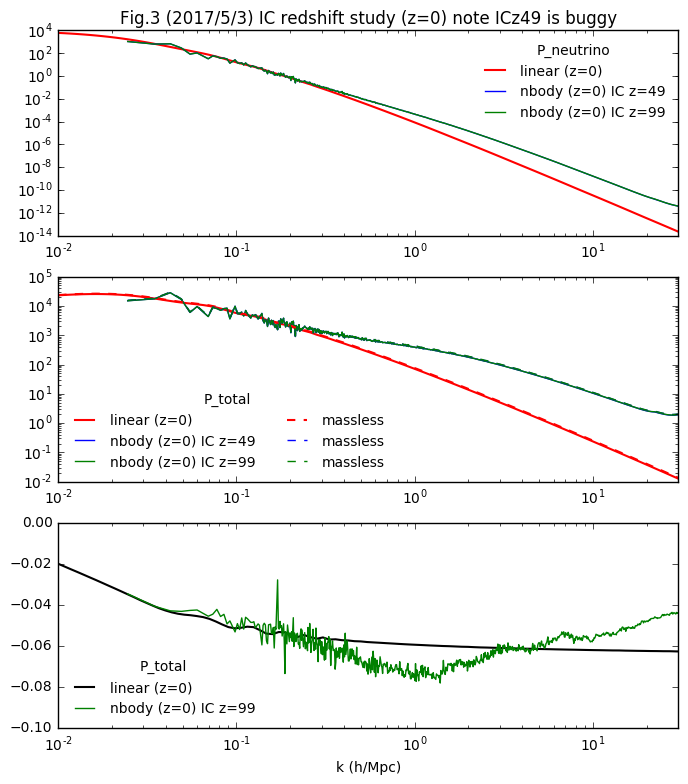

In [42]:
f=figure(figsize=(8,9))
#ax1=f.add_subplot(321)
#ax2=f.add_subplot(322)
#ax3=f.add_subplot(323)
ax4=f.add_subplot(311)
ax5=f.add_subplot(312)
ax6=f.add_subplot(313)

ax4.set_title('Fig.3 (2017/5/3 update 5/6) IC redshift study (z=0)')
ax4.plot(k_arr, ratio_nu*Pcamb1_interp, 'r-',lw=1.5,label='linear (z=0)')
ax4.plot(knb1, Pnbnu1_z0_IC49,'b-',label='nbody (z=0) IC z=49')
ax4.plot(knb1, Pnbnu1_z0_IC99,'g-',label='nbody (z=0) IC z=99')
ax4.set_yscale('log')
ax4.legend(frameon=0,loc=0,fontsize=10,ncol=1,title='P_neutrino')

ax5.plot(k_arr, Pcamb1_interp, 'r-',lw=1.5,label='linear (z=0)')
ax5.plot(knb1, Pnb1_IC49,'b-',label='nbody (z=0) IC z=49')
ax5.plot(knb1, Pnb1_IC99,'g-',label='nbody (z=0) IC z=99')
ax5.plot(k_arr, Pcamb0_interp, 'r--',lw=1.5,label='massless')
ax5.plot(knb1, Pnb0_IC49,'b--',label='massless')
ax5.plot(knb1, Pnb0_IC99,'g--',label='massless')
ax5.set_yscale('log')
ax5.legend(frameon=0,loc=0,fontsize=10,ncol=2,title='P_total')

ax6.plot(k_arr, Pcamb1_interp/Pcamb0_interp-1, 'k-',lw=1.5,label='linear (z=0)')
#ax6.plot(knb1, Pnb1_IC49/Pnb0_IC49-1,'b-',label='nbody (z=0) IC z=49')
ax6.plot(knb1, Pnb1_IC99/Pnb0_IC99-1,'g-',label='nbody (z=0) IC z=99')
ax6.set_ylim(-0.1,0)
ax6.legend(frameon=0,loc=0,fontsize=10,ncol=1,title='P_total')

#ax1.plot(knb1, Pnbnu1_z0_IC49/Pnbnu1_z0_IC99-1, 'r-',lw=1.5,label='P49/P99-1 (z=3)')
#ax1.set_ylabel('delta P_neutrino - 1')
#ax1.legend(frameon=0,loc=0,fontsize=10,ncol=1,title='P_neutrino')

#ax2.plot(knb1_IC99, Pnb1_IC49/Pnb1_IC99-1, 'r-',lw=1.5,label='P49/P99-1 (z=3 massive)')
#ax2.plot(knb1_IC99, Pnb0_IC49/Pnb0_IC99-1, 'b-',lw=1.5,label='P49/P99-1 (z=3 massless)')
#ax2.set_ylabel('delta P_tot - 1')
#ax2.legend(frameon=0,loc=0,fontsize=10,ncol=1,title='P_total')

#ax3.plot(knb1_IC99, (Pnb1_IC49/Pnb0_IC49)/(Pnb1_IC99/Pnb0_IC99)-1, 'r-',label='deltaz49/deltaz99-1')
#ax3.set_ylabel('delta delta_p - 1')
#ax3.text(0.02,0.03,'(Pmassive/Pmassless)_IC49 / (Pmassive/Pmassless)_IC99 -1',color='r')


for ax in [ax1,ax2,ax3,ax4,ax5,ax6]:
    ax.set_xscale('log')
    ax.set_xlim(1e-2, 30)
    if ax in [ax1,ax2,ax3]:
        ax.plot([1e-2, 30],[0,0],'k--')
        ax.set_ylim(-0.05,0.05)
    if ax in [ax3, ax6]:
        ax.set_xlabel('k (h/Mpc)')

show()

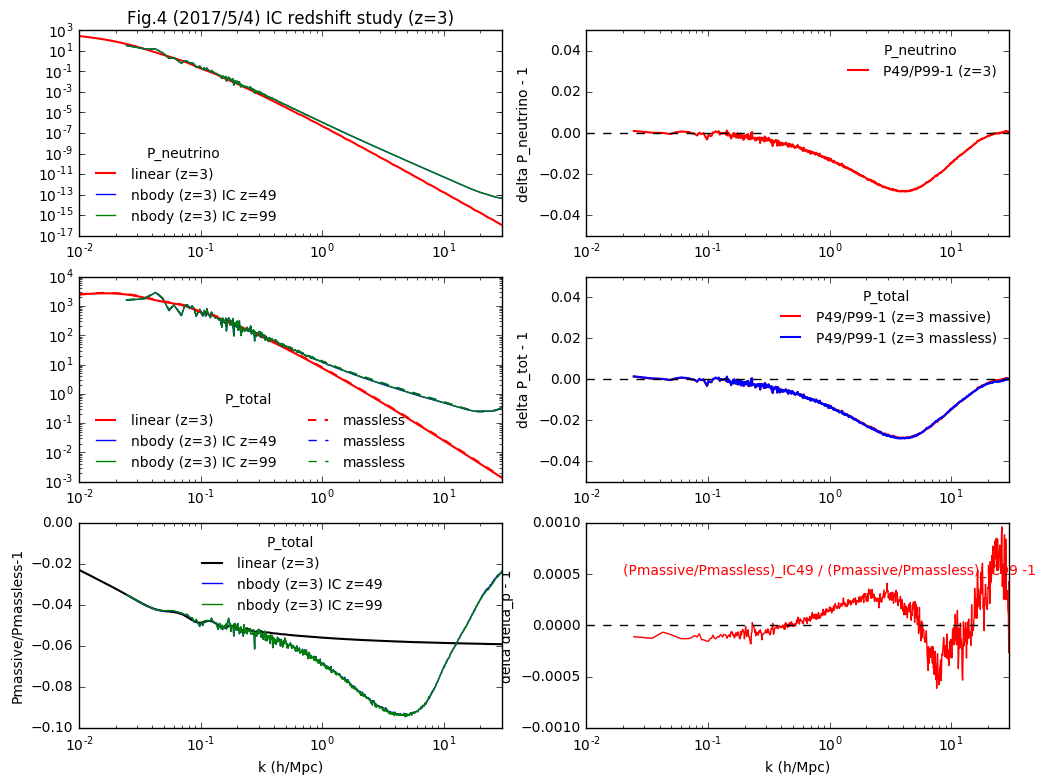

In [30]:
f=figure(figsize=(12,9))
ax1=f.add_subplot(322)
ax2=f.add_subplot(324)
ax3=f.add_subplot(326)
ax4=f.add_subplot(321)
ax5=f.add_subplot(323)
ax6=f.add_subplot(325)

ax4.set_title('Fig.4 (2017/5/4) IC redshift study (z=3)')
ax4.plot(k_arr, ratio_nu_z3*Pcamb1_z3_interp, 'r-',lw=1.5,label='linear (z=3)')
ax4.plot(knb1, Pnbnu1_z3_IC49,'b-',label='nbody (z=3) IC z=49')
ax4.plot(knb1, Pnbnu1_z3_IC99,'g-',label='nbody (z=3) IC z=99')
ax4.set_yscale('log')
ax4.legend(frameon=0,loc=0,fontsize=10,ncol=1,title='P_neutrino')
ax.set_ylabel('P_nu')

ax5.plot(k_arr, Pcamb1_z03_bin, 'r-',lw=1.5,label='linear (z=3)')
ax5.plot(knb1, Pnb1_z3_IC49,'b-',label='nbody (z=3) IC z=49')
ax5.plot(knb1, Pnb1_z3_IC99,'g-',label='nbody (z=3) IC z=99')
ax5.plot(k_arr, Pcamb0_z03_bin, 'r--',lw=1.5,label='massless')
ax5.plot(knb1, Pnb0_z3_IC49,'b--',label='massless')
ax5.plot(knb1, Pnb0_z3_IC99,'g--',label='massless')
ax.set_ylabel('P_tot')
ax5.set_yscale('log')
ax5.legend(frameon=0,loc=0,fontsize=10,ncol=2,title='P_total')

ax6.plot(k_arr, Pcamb1_z03_bin/Pcamb0_z03_bin-1, 'k-',lw=1.5,label='linear (z=3)')
ax6.plot(knb1, Pnb1_z3_IC49/Pnb0_z3_IC49-1,'b-',label='nbody (z=3) IC z=49')
ax6.plot(knb1, Pnb1_z3_IC99/Pnb0_z3_IC99-1,'g-',label='nbody (z=3) IC z=99')
ax6.set_ylim(-0.1,0)
ax6.legend(frameon=0,loc=0,fontsize=10,ncol=1,title='P_total')
ax6.set_ylabel('Pmassive/Pmassless-1')

ax1.plot(knb1, Pnbnu1_z3_IC49/Pnbnu1_z3_IC99-1, 'r-',lw=1.5,label='P49/P99-1 (z=3)')
ax1.set_ylabel('delta P_neutrino - 1')
ax1.legend(frameon=0,loc=0,fontsize=10,ncol=1,title='P_neutrino')
ax1.set_ylim(-0.05,0.05)

ax2.plot(knb1_IC99, Pnb1_z3_IC49/Pnb1_z3_IC99-1, 'r-',lw=1.5,label='P49/P99-1 (z=3 massive)')
ax2.plot(knb1_IC99, Pnb0_z3_IC49/Pnb0_z3_IC99-1, 'b-',lw=1.5,label='P49/P99-1 (z=3 massless)')
ax2.set_ylabel('delta P_tot - 1')
ax2.legend(frameon=0,loc=0,fontsize=10,ncol=1,title='P_total')
ax2.set_ylim(-0.05,0.05)

ax3.plot(knb1_IC99, (Pnb1_z3_IC49/Pnb0_z3_IC49)/(Pnb1_z3_IC99/Pnb0_z3_IC99)-1, 'r-',label='deltaz49/deltaz99-1')
ax3.set_ylabel('delta delta_p - 1')
ax3.text(0.02,-0.0007,'(Pmassive/Pmassless)_IC49 / (Pmassive/Pmassless)_IC99 -1',color='r')
ax3.set_ylim(-1e-3,1e-3)

for ax in [ax1,ax2,ax3,ax4,ax5,ax6]:
    ax.set_xscale('log')
    ax.set_xlim(1e-2, 30)
    if ax in [ax1,ax2,ax3]:
        ax.plot([1e-2, 30],[0,0],'k--')
    if ax in [ax3, ax6]:
        ax.set_xlabel('k (h/Mpc)')

show()

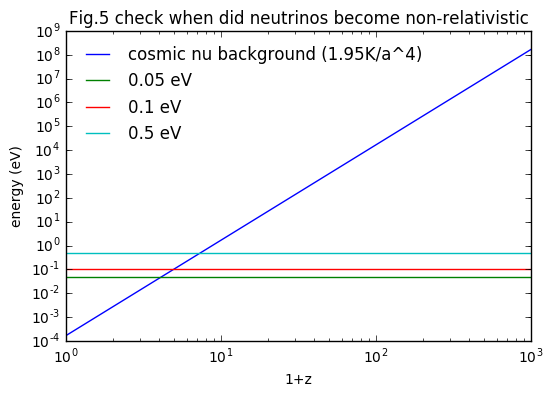

In [20]:
a_arr = logspace(-3, 0,100)
z_arr = 1/a_arr-1.0
f=figure(figsize=(6,4))
ax=f.add_subplot(111)
ax.plot(z_arr+1, 1.95*a_arr**(-4.0)*8.6e-5, label='cosmic nu background (1.95K/a^4)')
ax.plot(z_arr+1, 0.05*ones(100),label='0.05 eV')
ax.plot(z_arr+1, 0.1*ones(100),label='0.1 eV')
ax.plot(z_arr+1, 0.5*ones(100),label='0.5 eV')
ax.set_xlabel('1+z')
ax.set_ylabel('energy (eV)')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(fontsize=12,frameon=0,loc=0)
ax.set_title('Fig.5 check when did neutrinos become non-relativistic')
show()

In [46]:
from astropy.cosmology import FlatLambdaCDM
from astropy import units as u
######## radiation + 0.1 eV neutrinos
a=FlatLambdaCDM(H0=70, Om0=0.3, m_nu=[0.033, 0.033, 0.033]*u.eV)
######## radiation only
b=FlatLambdaCDM(H0=70, Om0=0.3)
######## no radiation, no neutrinos
c=FlatLambdaCDM(H0=70, Om0=0.3, Tcmb0=0*u.K)

for z in (3, 1100):
  for iii in range(3):
    idiff = [a,b,c][iii].comoving_distance(z)/a.comoving_distance(z)-1
    print 'D_%s (z=%i) = %.2f Mpc (%.2f%% from Rad+Nu)'%(s_arr[iii],z,[a,b,c][iii].comoving_distance(z).value, idiff*100.)

D_Rad+Nu (z=3) = 6341.30 Mpc (0.00% from Rad+Nu)
D_RadOnly (z=3) = 6354.29 Mpc (0.20% from Rad+Nu)
D_NoRad (z=3) = 6355.69 Mpc (0.23% from Rad+Nu)
D_Rad+Nu (z=1100) = 13586.95 Mpc (0.00% from Rad+Nu)
D_RadOnly (z=1100) = 13617.90 Mpc (0.23% from Rad+Nu)
D_NoRad (z=1100) = 13683.51 Mpc (0.71% from Rad+Nu)


In [93]:
print radians(3.5)*a.comoving_distance(45).value *h, 'Mpc/h'
x=FlatLambdaCDM(H0=70, Om0=0.25, m_nu=[0.033, 0.033, 0.033]*u.eV)
print degrees(512/0.7 / x.comoving_distance(45).value*0.7),'degrees'


504.917742504 Mpc/h
2.31727355339 degrees


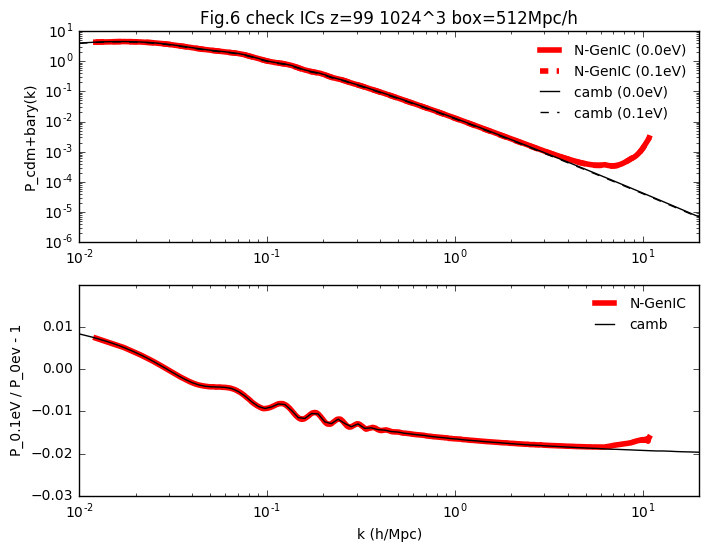

In [80]:
################ check IC for 512Mpc/h 1024^3 fiducla ###########
kIC0, PIC0, Nmode=loadtxt('matterpower/particles1024/PK-DM-ICs-massless').T
kIC1, PIC1, Nmode=loadtxt('matterpower/particles1024/PK-DM-ICs-massive').T
kcamb0_z99, Pcamb0_z99 = np.loadtxt('camb/camb_mnv0.00000_om0.30000_As2.1000_matterpow_99.dat').T
kcamb1_z99, Pcamb1_z99 = np.loadtxt('camb/camb_mnv0.10000_om0.30000_As2.1000_matterpow_99.dat').T

Pcamb0_z99=interp1d(kcamb0_z99, Pcamb0_z99)(k_arr)
Pcamb1_z99=interp1d(kcamb1_z99, Pcamb1_z99)(k_arr)
###### P_matter of DM+bary, or "no neutrino" (nn)
kTF99, Ttot99, Tnn99, Tnu99 = loadtxt('camb/camb_mnv0.10000_om0.30000_As2.1000_transfer_99.dat').T[[0,6,7,5]]
ratio_nn99 = interp1d(kTF99, (Tnn99/Ttot99)**2)(k_arr)
ratio_nu99 = interp1d(kTF99, (Tnu99/Ttot99)**2)(k_arr)

boxsize=512#Mpc/h
kIC0*=2*pi/boxsize
kIC1*=2*pi/boxsize
PIC0, PIC1 = PIC0*boxsize**3, PIC1*boxsize**3

f=figure(figsize=(8,6))
ax1=f.add_subplot(211)
ax2=f.add_subplot(212)
ax1.plot(kIC0, PIC0,'r-',lw=4,label='N-GenIC (0.0eV)')
ax1.plot(kIC1, PIC1,'r--',lw=4,label='N-GenIC (0.1eV)')
ax1.plot(k_arr, Pcamb0_z99,'k-',label='camb (0.0eV)')
ax1.plot(k_arr, Pcamb1_z99,'k--',label='camb (0.1eV)')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim(1e-2,20)
ax1.set_title('Fig.6 check ICs z=99 1024^3 box=512Mpc/h')
ax1.legend(frameon=0,loc=0,fontsize=10)
ax1.set_ylabel('P_cdm+bary(k)')

ax2.plot(kIC0, PIC1/PIC0-1,'r-',lw=4, label='N-GenIC')
ax2.plot(k_arr, Pcamb1_z99*ratio_nn99/Pcamb0_z99-1,'k-',label='camb')
ax2.set_xscale('log')
ax2.set_ylim(-0.03,0.02)
ax2.set_xlim(1e-2,20)
ax2.set_xlabel('k (h/Mpc)')
ax2.set_ylabel('P_0.1eV / P_0ev - 1')
ax2.legend(frameon=0,loc=0,fontsize=10)
show()
